In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Reading the dataframe

In [2]:
data = pd.read_csv('weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Summary statistics of the dataset

In [3]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## Detecting outliers with boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

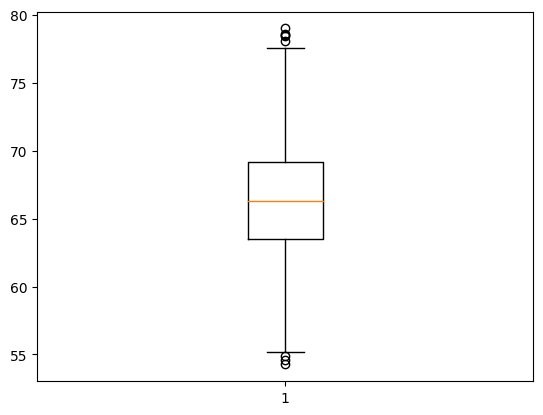

In [4]:
plt.boxplot(data['Height'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

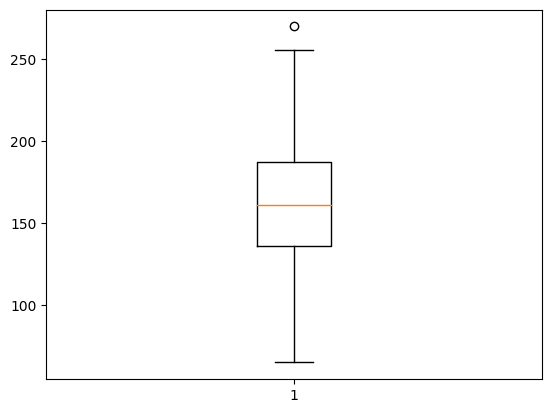

In [5]:
plt.boxplot(data['Weight'])
plt.show

In [6]:
#detecting outlier using z score
lower_limit = np.mean(data['Height']) - 3* np.std(data['Height'])
upper_limit = np.mean(data['Height']) + 3* np.std(data['Height'])

In [7]:
#Trimming the data
new_data = data.loc[(data['Height'] < upper_limit) & (data['Height'] > lower_limit)]

<function matplotlib.pyplot.show(close=None, block=None)>

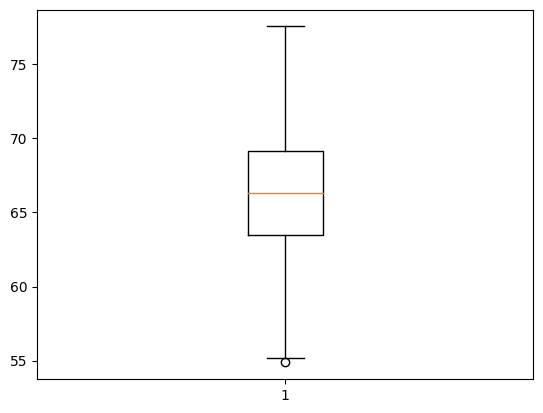

In [8]:
plt.boxplot(new_data['Height'])
plt.show

In [9]:
#Winsorizing the data
new_data = data.copy()
new_data.loc[(new_data['Height'] > upper_limit), 'Height'] = upper_limit
new_data.loc[(new_data['Height'] < lower_limit), 'Height'] = lower_limit
new_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<function matplotlib.pyplot.show(close=None, block=None)>

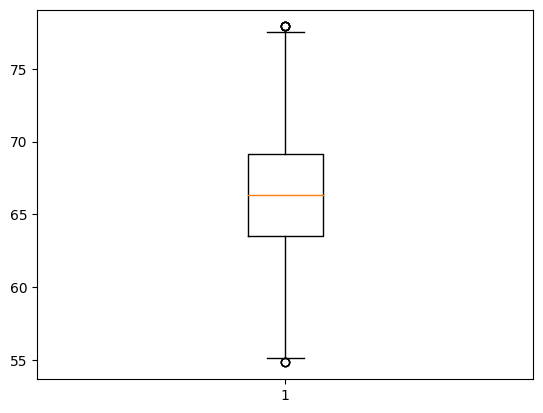

In [10]:
plt.boxplot(new_data['Height'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

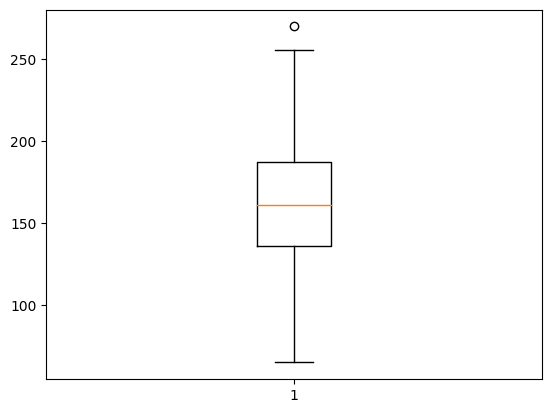

In [11]:
plt.boxplot(new_data['Weight'])
plt.show

In [14]:
data.drop('Gender', axis= 1, inplace=True)

### Clustering

In [31]:
pca = PCA()
data = pca.fit_transform(data)

In [32]:
#elbow method
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=10)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)
    
print(wss)

C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-p

[10456507.525427185, 2936526.325389007, 1566001.4923325917, 956776.376548768, 655171.430769756, 483913.76033226063, 369111.793691413, 294859.9875867198, 240889.63095114648, 203574.3814865179]


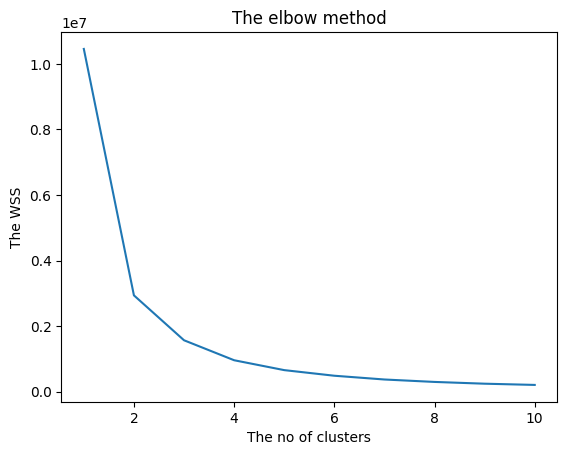

In [33]:
plt.plot(range(1, 11), wss)
plt.title('The elbow method')
plt.xlabel('The no of clusters')
plt.ylabel('The WSS')
plt.show()

In [38]:
# clustering the features
kmeans = KMeans(n_clusters=4, init ='k-means++', random_state=10)
label = kmeans.fit_predict(data)

print(label)

[1 2 1 ... 0 2 0]


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


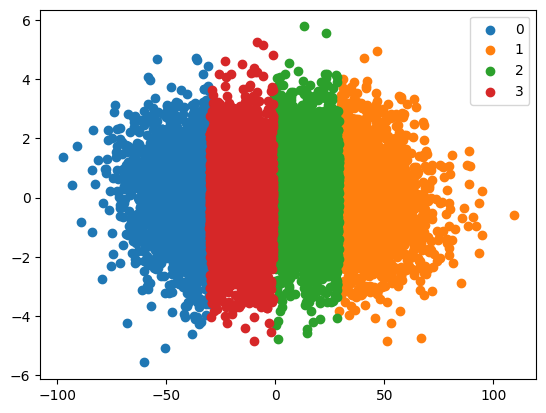

In [39]:
for i in np.unique(label):
    plt.scatter(data[label == i, 0], data[label == i, 1], label = i)

plt.legend()


In [45]:
# using silhouette method
silhouette_coef = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', random_state=10)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_ )
    silhouette_coef.append(score)
    print(f'for clusters{i}, the silouhette score is {score}')

C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters2, the silouhette score is 0.6109368339102345


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters3, the silouhette score is 0.5393981937289019


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters4, the silouhette score is 0.5193034473755742


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters5, the silouhette score is 0.5094987966676344


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters6, the silouhette score is 0.4981711334051014


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters7, the silouhette score is 0.49590499904272045


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters8, the silouhette score is 0.48999894819248074


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters9, the silouhette score is 0.4843124790725357


C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


for clusters10, the silouhette score is 0.4775746562945442


Text(0, 0.5, 'silhouette coef')

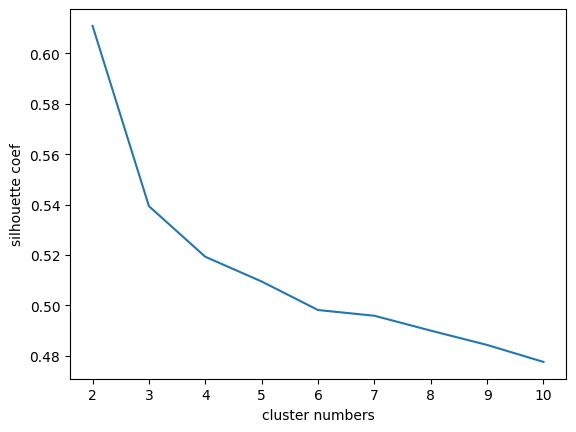

In [49]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('cluster numbers')
plt.ylabel('silhouette coef')

In [51]:
kmeans = KMeans(n_clusters=4, init ='k-means++', random_state=10)
label = kmeans.fit_predict(data)


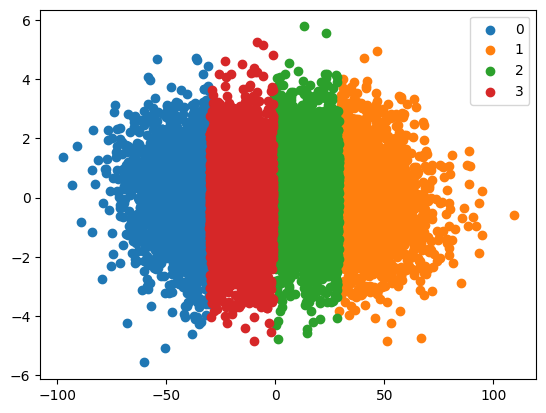

In [53]:
for i in np.unique(label):
    plt.scatter(data[label == i, 0], data[label ==i , 1], label = i)

plt.legend()